In [3]:
import pandas as pd 
import json 

In [11]:
%ls

EVA-4/                Untitled.ipynb        via_export_coco.json*
PyTNet/               papers/               via_export_json.json*


In [12]:
file = "via_export_coco.json"

In [13]:
with open(file) as train_file:
    dict_train = json.load(train_file)

In [14]:
dict_train


{'info': {'year': 2020,
  'version': '1',
  'description': 'Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)',
  'contributor': '',
  'url': 'http://www.robots.ox.ac.uk/~vgg/software/via/',
  'date_created': 'Sat Apr 18 2020 16:56:17 GMT+0530 (India Standard Time)'},
 'images': [{'id': 0,
   'width': 600,
   'height': 400,
   'file_name': 'adutta_swan.jpg',
   'license': 1,
   'flickr_url': 'adutta_swan.jpg',
   'coco_url': 'adutta_swan.jpg',
   'date_captured': ''},
  {'id': 1,
   'width': 600,
   'height': 394,
   'file_name': 'wikimedia_death_of_socrates.jpg',
   'license': 1,
   'flickr_url': 'wikimedia_death_of_socrates.jpg',
   'coco_url': 'wikimedia_death_of_socrates.jpg',
   'date_captured': ''},
  {'id': 2,
   'width': 960,
   'height': 644,
   'file_name': 'd5.jpg',
   'license': 1,
   'date_captured': ''},
  {'id': 3,
   'width': 1064,
   'height': 1887,
   'file_name': 'd6.jpg',
   'license': 1,
   'date_captured': ''},
  {'id': 4,
   'widt

In [15]:
dataset = dict()
dataset['Image'] = list()
dataset['Img-Width'] = list()
dataset['Img-Height'] = list()
dataset['Class'] = list()
dataset['Box-x'] = list()
dataset['Box-y'] = list()
dataset['Box-w'] = list()
dataset['Box-h'] = list()

In [16]:
for i in range(50):
    dataset['Image'].append(dict_train['images'][i]['file_name'])
    dataset['Img-Width'].append(dict_train['images'][i]['width'])
    dataset['Img-Height'].append(dict_train['images'][i]['height'])
    dataset['Class'].append('Dog')
    dataset['Box-x'].append(dict_train['annotations'][i]['bbox'][0])
    dataset['Box-y'].append(dict_train['annotations'][i]['bbox'][1])
    dataset['Box-w'].append(dict_train['annotations'][i]['bbox'][2])
    dataset['Box-h'].append(dict_train['annotations'][i]['bbox'][3])

In [17]:
# converting json dataset from dictionary to dataframe
train = pd.DataFrame.from_dict(dataset, orient='index')
train = train.T

In [36]:
train = train.drop([3],)

In [41]:
train = train.reset_index(drop = True)

In [42]:
train

,Image,Img-Width,Img-Height,Class,Box-x,Box-y,Box-w,Box-h
0,adutta_swan.jpg,600,400,Dog,94,124,312,149
1,wikimedia_death_of_socrates.jpg,600,394,Dog,174,139,108,227
2,d5.jpg,960,644,Dog,347,114,91,209
3,d8.jpg,600,399,Dog,208,74,528,519
4,d11.jpg,600,900,Dog,38,222,985,1562
5,d14.jpg,284,177,Dog,264,27,331,367
6,d15.jpg,194,259,Dog,0,165,581,664
7,d18.png,1280,720,Dog,107,5,140,170
8,d20.jpg,1920,1080,Dog,33,49,151,152
9,d23.jpg,736,459,Dog,361,168,522,421


In [43]:
train_final = train.copy()

In [44]:
for i in range(len(train_final)):
    train_final['Box-x'][i] = round(train_final['Box-x'][i]/train_final['Img-Width'][i],2)
    train_final['Box-y'][i] = round(train_final['Box-y'][i]/train_final['Img-Height'][i],2)
    train_final['Box-w'][i] = round(train_final['Box-w'][i]/train_final['Img-Width'][i],2)
    train_final['Box-h'][i] = round(train_final['Box-h'][i]/train_final['Img-Height'][i],2)

In [45]:
train_final.head()

,Image,Img-Width,Img-Height,Class,Box-x,Box-y,Box-w,Box-h
0,adutta_swan.jpg,600,400,Dog,0.16,0.31,0.52,0.37
1,wikimedia_death_of_socrates.jpg,600,394,Dog,0.29,0.35,0.18,0.58
2,d5.jpg,960,644,Dog,0.36,0.18,0.09,0.32
3,d8.jpg,600,399,Dog,0.35,0.19,0.88,1.3
4,d11.jpg,600,900,Dog,0.06,0.25,1.64,1.74


In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [47]:
df = train_final[['Box-w','Box-h']]

[[1.07692308 1.49230769]
 [0.42857143 0.51642857]
 [1.85875    2.81625   ]]


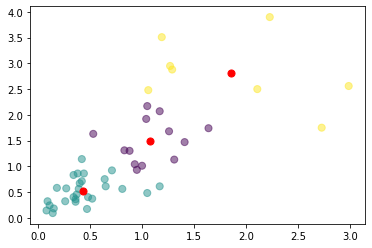

In [48]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

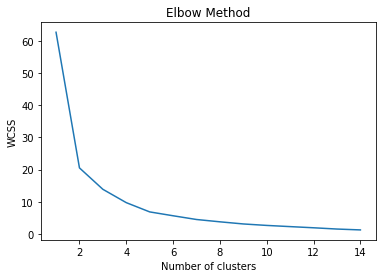

In [49]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


[[0.42857143 0.51642857]
 [1.07692308 1.49230769]
 [1.408      3.144     ]
 [2.61       2.27      ]]


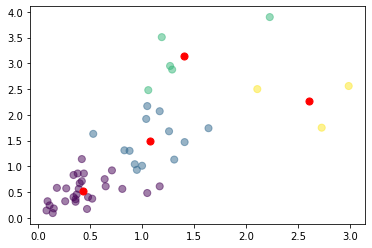

In [50]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[2.61       2.27      ]
 [0.32727273 0.45454545]
 [1.145      1.895     ]
 [1.495      3.31      ]
 [0.89166667 0.93166667]]


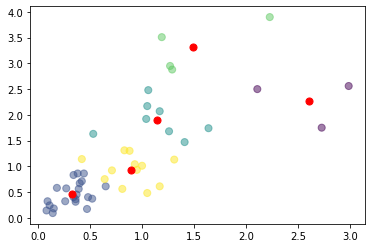

In [51]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()